In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, time, random, sys, warnings

In [2]:
path = r'/home/d/dlr10/Documents/02_Statitics_modelling/DataSets/'

X_data_16_18 = pickle.load(open(path + 'df_ts_2016_18.pickle','rb'))

X_data_19_20 = pickle.load(open(path + 'df_ts_2019_20.pickle','rb'))


In [3]:
len(X_data_19_20['admission_id'].unique())

7892

In [4]:
X_data_16_18.columns

Index(['admission_id', 'rr', 'ews', 'heart_rate', 'temperature', 'sbp', 'dbp',
       'Oxygen_Saturation', 'Assisted_O2', 'Confusion', 'CREA', 'UREA', 'K',
       'GFR', 'WBC', 'PLT', 'HCT', 'HGB', 'RBC', 'MCH', 'MCV', 'NEUAB',
       'TLYMAB', 'EOSAB', 'MONAB', 'BASAB', 'ALB', 'ALP', 'BILI',
       'no_sample_series', 'sex', 'ethnicity', 'age_at_admin', 'Comorb_score',
       'Spcfc_Comorb', 'Mortality'],
      dtype='object')

In [5]:
def compute_CURB65(x):
    adm_age = x['age_at_admin']
    adm_conf = x['Confusion']
    adm_rr = x['rr']
    adm_urea = x['UREA']
    adm_sbp = x['sbp']
    adm_dbp = x['dbp']
    CURB_score = 0
    if adm_age  >= 65: CURB_score = CURB_score + 1
    if adm_conf >= 8: CURB_score = CURB_score + 1
    if adm_rr   >= 30: CURB_score = CURB_score + 1
    if adm_urea >= 7: CURB_score = CURB_score + 1
    if (adm_sbp <= 90) or (adm_dbp <= 60): CURB_score = CURB_score + 1
    return CURB_score

In [6]:
X_data_16_18['CURB65'] = X_data_16_18.apply(lambda x: compute_CURB65(x), axis = 1)
X_data_16_18['CURB_tier'] = X_data_16_18['CURB65'].apply(lambda x: 0 if x==0 else 1 if x<3 else 2)

In [7]:
X_data_16_18

,admission_id,rr,ews,heart_rate,temperature,sbp,dbp,Oxygen_Saturation,Assisted_O2,Confusion,...,BILI,no_sample_series,sex,ethnicity,age_at_admin,Comorb_score,Spcfc_Comorb,Mortality,CURB65,CURB_tier
0,78793793,20.000000,2.0,98.0,37.4,101.0,40.0,97.0,1.0,1.0,...,6.0,0,-1.0,0.0,88.0,2.0,0.0,1.0,3,2
1,78793793,19.714285,1.0,95.428571,37.514286,109.285714,55.714286,97.571429,1.0,1.0,...,6.0,1,-1.0,0.0,88.0,2.0,0.0,1.0,3,2
2,78793793,19.428572,1.0,92.857143,37.628571,117.571429,71.428571,98.142857,1.0,1.0,...,6.0,2,-1.0,0.0,88.0,2.0,0.0,1.0,2,1
3,78793793,19.142857,0.0,90.285714,37.742857,125.857143,87.142857,98.714286,1.0,1.0,...,6.0,3,-1.0,0.0,88.0,2.0,0.0,1.0,2,1
4,78793793,19.200001,0.0,92.8,37.58,131.6,87.2,98.0,1.0,1.0,...,6.0,4,-1.0,0.0,88.0,2.0,0.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352155,35965296,17.222221,2.0,103.055556,36.8,105.722222,76.777778,98.833333,1.0,1.0,...,41.0,139,1.0,14.0,47.0,1.0,1.0,0.0,0,0
1352156,35965296,17.000000,2.0,102.5,36.8,106.5,77.0,98.5,1.0,1.0,...,41.0,140,1.0,14.0,47.0,1.0,1.0,0.0,0,0
1352157,35965296,16.777779,2.0,101.944444,36.8,107.277778,77.222222,98.166667,1.0,1.0,...,41.0,141,1.0,14.0,47.0,1.0,1.0,0.0,0,0
1352158,35965296,16.555555,2.0,101.388889,36.8,108.055556,77.444444,97.833333,1.0,1.0,...,41.0,142,1.0,14.0,47.0,1.0,1.0,0.0,0,0


<AxesSubplot:>

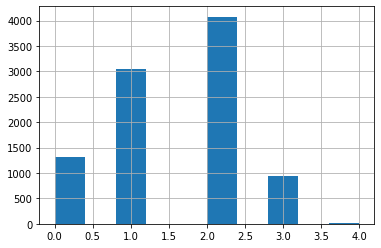

In [8]:
X_data_16_18[X_data_16_18['no_sample_series'] == 143]['CURB65'].hist()

<AxesSubplot:>

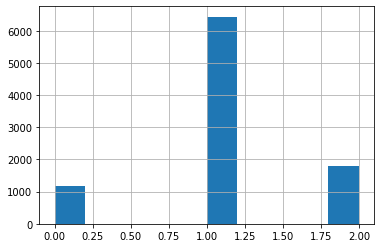

In [15]:
X_data_16_18[X_data_16_18['no_sample_series'] == 0]['CURB_tier'].hist()

In [18]:
list_df = []
for i in [0,1,2]:
    adms_ = X_data_16_18[(X_data_16_18['no_sample_series'] == 0) & (X_data_16_18['CURB_tier'] == i)]['admission_id'].unique().tolist()
    df_temp = X_data_16_18[X_data_16_18['admission_id'].isin(adms_)].copy()
    df_temp = df_temp.drop(columns = ['no_sample_series', 'CURB_tier','CURB65', 'ews'])
    df_temp = df_temp.reset_index(drop=True)
    
    print(len(df_temp['admission_id'].unique()))
    list_df.append(df_temp)
    

1164
6439
1787


In [19]:
pickle.dump(list_df , open(path + 'df_ts_curb_2016_18_1d.pickle', 'wb'))

In [13]:
X_data_19_20['CURB65'] = X_data_16_18.apply(lambda x: compute_CURB65(x), axis = 1)
X_data_19_20['CURB_tier'] = X_data_19_20['CURB65'].apply(lambda x: 0 if x==0 else 1 if x<3 else 2)

In [14]:
X_data_19_20

,admission_id,rr,ews,heart_rate,temperature,sbp,dbp,Oxygen_Saturation,Assisted_O2,Confusion,...,BILI,no_sample_series,sex,ethnicity,age_at_admin,Comorb_score,Spcfc_Comorb,Mortality,CURB65,CURB_tier
0,70461223,17.000000,2.0,102.0,36.5,148.0,80.0,95.0,0.0,0.0,...,8.0,0,1.0,0.0,69.0,0.0,1.0,0.0,3,2
1,70461223,16.981981,2.0,101.711712,36.503604,147.765766,79.63964,95.018018,0.0,1.0,...,8.0,1,1.0,0.0,69.0,0.0,1.0,0.0,3,2
2,70461223,16.963964,2.0,101.423423,36.507207,147.531532,79.279279,95.036036,0.0,1.0,...,8.0,2,1.0,0.0,69.0,0.0,1.0,0.0,2,1
3,70461223,16.945946,2.0,101.135135,36.510811,147.297297,78.918919,95.054054,0.0,1.0,...,8.0,3,1.0,0.0,69.0,0.0,1.0,0.0,2,1
4,70461223,16.927927,2.0,100.846847,36.514414,147.063063,78.558559,95.072072,0.0,1.0,...,8.0,4,1.0,0.0,69.0,0.0,1.0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136443,45308426,18.000000,0.0,83.285714,36.628571,115.333333,71.904762,98.095238,0.0,0.0,...,7.0,139,1.0,1.0,73.0,1.0,0.0,0.0,1,1
1136444,45308426,18.000000,0.0,83.571429,36.657143,116.666667,71.809524,98.190476,0.0,0.0,...,7.0,140,1.0,1.0,73.0,1.0,0.0,0.0,1,1
1136445,45308426,18.000000,0.0,83.857143,36.685714,118.0,71.714286,98.285714,0.0,0.0,...,7.0,141,1.0,1.0,73.0,1.0,0.0,0.0,1,1
1136446,45308426,18.000000,0.0,84.142857,36.714286,119.333333,71.619048,98.380952,0.0,0.0,...,7.0,142,1.0,1.0,73.0,1.0,0.0,0.0,1,1


<AxesSubplot:>

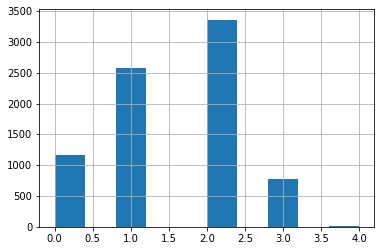

In [15]:
X_data_19_20[X_data_19_20['no_sample_series'] == 143]['CURB65'].hist()

<AxesSubplot:>

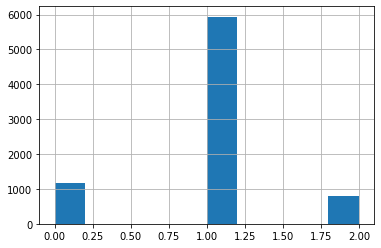

In [16]:
X_data_19_20[X_data_19_20['no_sample_series'] == 143]['CURB_tier'].hist()

In [17]:
list_df_19_20 = []
for i in [0,1,2]:
    adms_ = X_data_19_20[(X_data_19_20['no_sample_series'] == 143) & (X_data_19_20['CURB_tier'] == i)]['admission_id'].unique().tolist()
    df_temp = X_data_19_20[X_data_19_20['admission_id'].isin(adms_)].copy()
    df_temp = df_temp.drop(columns = ['no_sample_series', 'CURB_tier','CURB65', 'ews'])
    df_temp = df_temp.reset_index(drop=True)
    print(len(df_temp))
    list_df_19_20.append(df_temp)

168768
854928
112752


In [18]:
pickle.dump(list_df_19_20, open(path + 'df_ts_curb_2019_20_1d.pickle', 'wb'))